# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from FeedForwardNN import FFNN

# Generating Synthetic Data for Polynomial Regression


In [2]:
np.random.seed(0)
# Make data.
n = 100
x = np.random.rand(n,1)
y = 1+2*x+3*x**2+np.random.randn(n,1)

# Preparing the Design Matrix and Splitting the Data for Training and Testing


In [3]:
# Creating the design matrix with polynomial features (including intercept term)
X = np.c_[np.ones((n, 1)), x, x**2]

#Splitting into train, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling the design matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Training and Comparing Multiple Regression Models on Scaled Training Data


Epoch 0, Loss: 2.4875, Train Acc: 0.0000
Epoch 10, Loss: 1.1657, Train Acc: 0.0000
Epoch 20, Loss: 1.1502, Train Acc: 0.0000
Epoch 30, Loss: 1.1374, Train Acc: 0.0000
Epoch 40, Loss: 1.0730, Train Acc: 0.0000
Epoch 50, Loss: 1.2297, Train Acc: 0.0000
Epoch 60, Loss: 1.1670, Train Acc: 0.0000
Epoch 70, Loss: 1.0124, Train Acc: 0.0000
Epoch 80, Loss: 1.0972, Train Acc: 0.0000
Epoch 90, Loss: 1.8584, Train Acc: 0.0000
Custom Flexible FFNN MSE (Training Data): 2.2237
OLS MSE (Training Data): 2.4213
Ridge MSE (Training Data): 2.4035
Scikit-Learn MLPRegressor MSE (Training Data): 2.9951


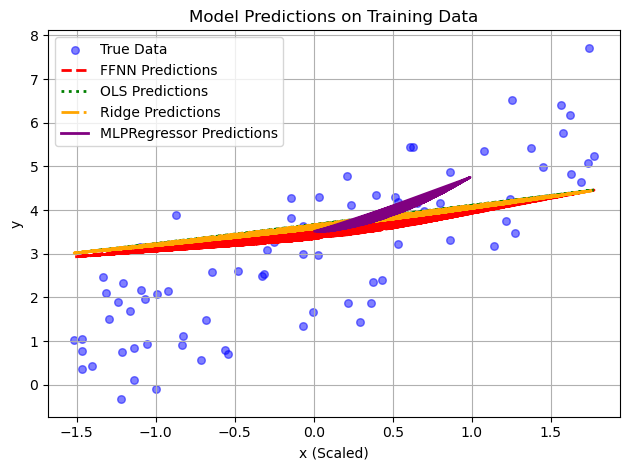

In [4]:
# Train the custom FlexibleFFNN model for regression on the training data
ffnn = FFNN(layers=[3, 16, 8, 1], learning_rate=0.1, activation='sigmoid', task_type='regression')  # Define the model structure and settings
ffnn.fit(X_train_scaled, y_train, epochs=100, batch_size=10)  # Train the model with scaled training data

# Make predictions using the FFNN model on the training data
y_pred_ffnn = ffnn.predict(X_train)

# Train a Linear Regression model
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)  # Fit the model to the training data
y_pred_ols = ols.predict(X_train)  # Make predictions on the training data

# Train a Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)  # Fit the model to the training data
y_pred_ridge = ridge.predict(X_train)  # Make predictions on the training data

# Train a Scikit-Learn Multi-Layer Perceptron (MLP) Regressor for comparison
mlp_regressor = MLPRegressor(hidden_layer_sizes=(16, 8), learning_rate_init=0.01, max_iter=200, solver='sgd', random_state=42)
mlp_regressor.fit(X_train_scaled, y_train.ravel())  # Fit the model to the training data
y_pred_sklearn = mlp_regressor.predict(X_train)  # Make predictions on the training data

# Calculate Mean Squared Errors (MSE) for each model on the training data
mse_ffnn = mean_squared_error(y_train, y_pred_ffnn)  # MSE for the FFNN model
mse_ols = mean_squared_error(y_train, y_pred_ols)  # MSE for the OLS model
mse_ridge = mean_squared_error(y_train, y_pred_ridge)  # MSE for the Ridge model
mse_sklearn = mean_squared_error(y_train, y_pred_sklearn)  # MSE for the MLP model

# Print the MSE results for comparison
print(f'Custom Flexible FFNN MSE (Training Data): {mse_ffnn:.4f}')
print(f'OLS MSE (Training Data): {mse_ols:.4f}')
print(f'Ridge MSE (Training Data): {mse_ridge:.4f}')
print(f'Scikit-Learn MLPRegressor MSE (Training Data): {mse_sklearn:.4f}')

# Plot the predictions of all models on the training data
plt.scatter(X_train_scaled[:, 1], y_train, label='True Data', color='blue', s=30, alpha=0.5)  # Plot the true training data
plt.plot(X_train_scaled[:, 1], y_pred_ffnn, label='FFNN Predictions', color='red', linestyle='--', linewidth=2)  # FFNN predictions
plt.plot(X_train_scaled[:, 1], y_pred_ols, label='OLS Predictions', color='green', linestyle=':', linewidth=2)  # OLS predictions
plt.plot(X_train_scaled[:, 1], y_pred_ridge, label='Ridge Predictions', color='orange', linestyle='-.', linewidth=2)  # Ridge predictions
plt.plot(X_train[:, 1], y_pred_sklearn, label='MLPRegressor Predictions', color='purple', linestyle='-', linewidth=2)  # MLP predictions

plt.title('Model Predictions on Training Data')  # Title for the plot
plt.xlabel('x (Scaled)')  # Label for the x-axis
plt.ylabel('y')  # Label for the y-axis
plt.legend(loc='best')  # Place the legend in the best location
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of plot elements
plt.show()  # Display the plot


# Training and Evaluating Multiple Regression Models on Scaled Test Data


Epoch 0, Loss: 18.4326, Train Acc: 0.0000
Epoch 10, Loss: 12.9202, Train Acc: 0.0000
Epoch 20, Loss: 13.0309, Train Acc: 0.0000
Epoch 30, Loss: 12.5762, Train Acc: 0.0000
Epoch 40, Loss: 12.8480, Train Acc: 0.0000
Epoch 50, Loss: 13.1117, Train Acc: 0.0000
Epoch 60, Loss: 13.4382, Train Acc: 0.0000
Epoch 70, Loss: 14.0035, Train Acc: 0.0000
Epoch 80, Loss: 15.1905, Train Acc: 0.0000
Epoch 90, Loss: 15.3554, Train Acc: 0.0000
Epoch 100, Loss: 14.8178, Train Acc: 0.0000
Epoch 110, Loss: 15.9754, Train Acc: 0.0000
Epoch 120, Loss: 16.1396, Train Acc: 0.0000
Epoch 130, Loss: 16.7755, Train Acc: 0.0000
Epoch 140, Loss: 16.1366, Train Acc: 0.0000
Epoch 150, Loss: 17.0678, Train Acc: 0.0000
Epoch 160, Loss: 17.6072, Train Acc: 0.0000
Epoch 170, Loss: 17.5264, Train Acc: 0.0000
Epoch 180, Loss: 17.5779, Train Acc: 0.0000
Epoch 190, Loss: 18.2273, Train Acc: 0.0000
Custom FFNN MSE (Scaled): 1.6835, R²: 0.1964
OLS MSE (Scaled): 0.9116, R²: 0.5649
Ridge MSE (Scaled): 0.9088, R²: 0.5662
Scikit-Lea

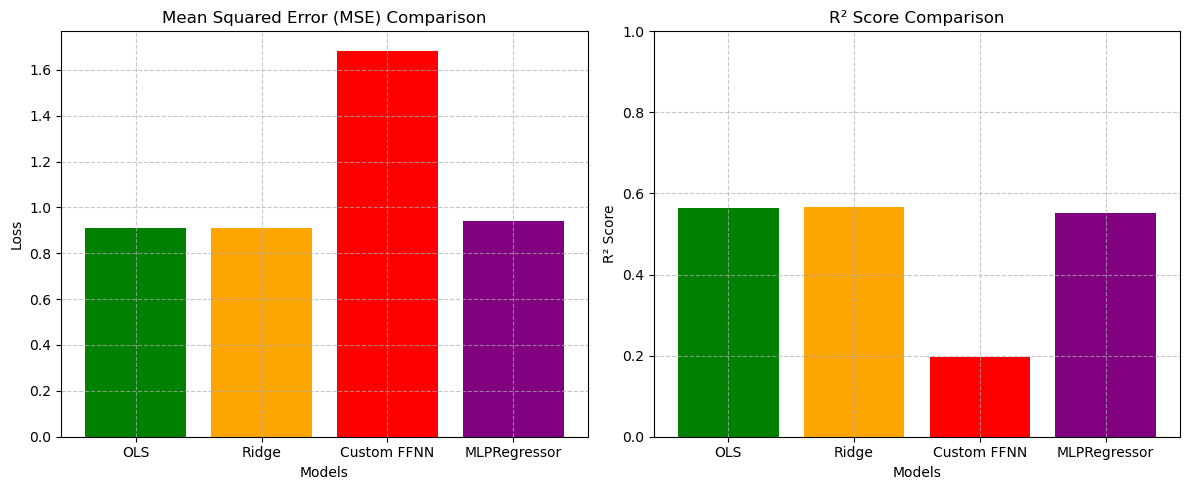

In [80]:
# Creating and train the custom FFNN model for regression on the scaled training data
ffnn = FFNN(layers=[3, 32, 16, 1], learning_rate=0.027, activation='sigmoid', rho=0.1, lmbda=0.1, task_type='regression')  # Set up the model structure and parameters
ffnn.fit(X_train, y_train, epochs=200, batch_size=50)  # Train the model for 200 epochs with a batch size of 50

# Making predictions on the test data using the FFNN model
y_pred_ffnn = ffnn.predict(X_test_scaled)

# Training an Ordinary Least Squares (OLS) regression model
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)  # Fit the OLS model to the training data
y_pred_ols = ols.predict(X_test_scaled)  # Predict on the test data

# Training a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)  # Fit the Ridge model to the training data
y_pred_ridge = ridge.predict(X_test_scaled)  # Predict on the test data

# Training a Multi-Layer Perceptron (MLP) regressor from scikit-learn
mlp_regressor = MLPRegressor(hidden_layer_sizes=(16, 8), learning_rate_init=0.02, max_iter=200, solver='sgd', random_state=42)
mlp_regressor.fit(X_train_scaled, y_train.ravel())  # Fit the MLP model to the training data
y_pred_sklearn = mlp_regressor.predict(X_test_scaled)  # Predict on the test data

# Calculating Mean Squared Errors (MSE) for each model on the test set
mse_ffnn = mean_squared_error(y_test, y_pred_ffnn)  # MSE for the FFNN model
mse_ols = mean_squared_error(y_test, y_pred_ols)  # MSE for the OLS model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)  # MSE for the Ridge model
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)  # MSE for the MLP model

# Calculating R² scores for each model on the test set
r2_ffnn = r2_score(y_test, y_pred_ffnn)  # R² score for the FFNN
r2_ols = r2_score(y_test, y_pred_ols)  # R² score for the OLS model
r2_ridge = r2_score(y_test, y_pred_ridge)  # R² score for the Ridge model
r2_sklearn = r2_score(y_test, y_pred_sklearn)  # R² score for the MLP model

# Printing the MSE and R² results for comparison
print(f'Custom FFNN MSE (Scaled): {mse_ffnn:.4f}, R²: {r2_ffnn:.4f}')
print(f'OLS MSE (Scaled): {mse_ols:.4f}, R²: {r2_ols:.4f}')
print(f'Ridge MSE (Scaled): {mse_ridge:.4f}, R²: {r2_ridge:.4f}')
print(f'Scikit-Learn MLPRegressor MSE (Scaled): {mse_sklearn:.4f}, R²: {r2_sklearn:.4f}')

# Prepare for visualization of MSE and R² scores
models = ['OLS', 'Ridge', 'Custom FFNN', 'MLPRegressor']  # List of model names
mse_values = [mse_ols, mse_ridge, mse_ffnn, mse_sklearn]  # List of MSE values for each model
r2_values = [r2_ols, r2_ridge, r2_ffnn, r2_sklearn]  # List of R² values for each model

# Creating bar plots for MSE and R² score comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Mean Squared Error (MSE)
axes[0].bar(models, mse_values, color=['green', 'orange', 'red', 'purple'])  # Bar plot for MSE
axes[0].set_title('Mean Squared Error (MSE) Comparison')  # Title for MSE plot
axes[0].set_ylabel('Loss')  # Label for the y-axis
axes[0].set_xlabel('Models')  # Label for the x-axis
axes[0].grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Subplot 2: R² Score
axes[1].bar(models, r2_values, color=['green', 'orange', 'red', 'purple'])  # Bar plot for R² scores
axes[1].set_title('R² Score Comparison')  # Title for R² plot
axes[1].set_ylabel('R² Score')  # Label for the y-axis
axes[1].set_xlabel('Models')  # Label for the x-axis
axes[1].set_ylim([0.0, 1.0])  # Set y-axis limits for clarity
axes[1].grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better readability

plt.tight_layout()  # Adjustting layout to prevent overlapping
plt.show()  # Displaying the plots



# Testing Activation Functions (Task C)

Epoch 0, Loss: 3.1448, Train Acc: 0.0000
Epoch 10, Loss: 1.6520, Train Acc: 0.0000
Epoch 20, Loss: 1.0710, Train Acc: 0.0000
Epoch 30, Loss: 1.0286, Train Acc: 0.0000
Epoch 40, Loss: 1.0402, Train Acc: 0.0000
Epoch 0, Loss: 2.7628, Train Acc: 0.0000
Epoch 10, Loss: 1.0932, Train Acc: 0.0000
Epoch 20, Loss: 1.0585, Train Acc: 0.0000
Epoch 30, Loss: 1.0933, Train Acc: 0.0000
Epoch 40, Loss: 1.0250, Train Acc: 0.0000
Epoch 0, Loss: 1.9675, Train Acc: 0.0000
Epoch 10, Loss: 0.9995, Train Acc: 0.0000
Epoch 20, Loss: 1.0389, Train Acc: 0.0000
Epoch 30, Loss: 0.9879, Train Acc: 0.0000
Epoch 40, Loss: 1.0018, Train Acc: 0.0000
Leaky ReLU output range during training:
Min: 1.148277480395743
Max: 5.647462574119267


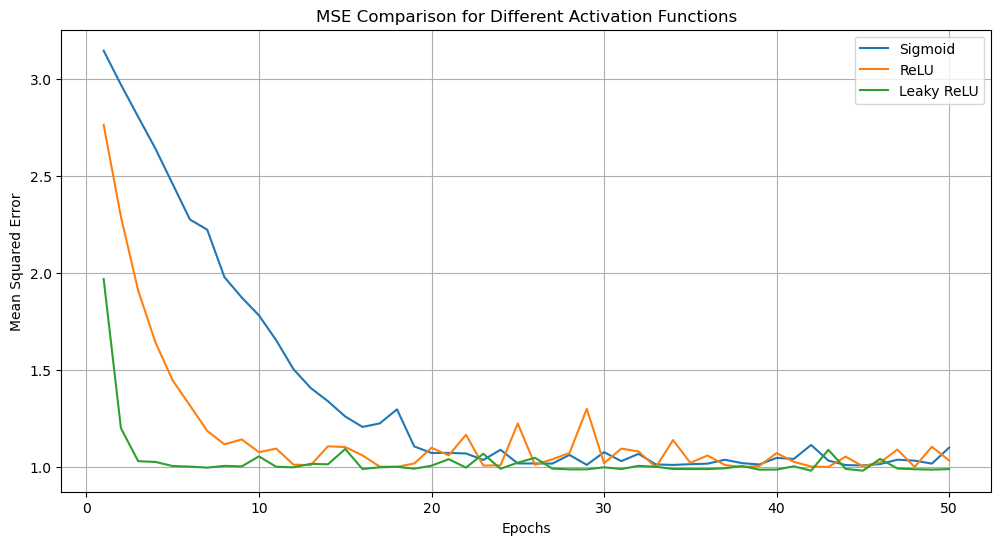

In [81]:
# Defining epochs and learning rates
epoch = 50

# Training with Sigmoid Activation
model_sigmoid = FFNN(layers=[3, 5, 1], learning_rate=0.02, activation='sigmoid', rho=0.1)
model_sigmoid.fit(X_train, y_train, epochs=epoch, batch_size=10)

# Training with ReLU Activation
model_relu = FFNN(layers=[3, 5, 1], learning_rate=0.02, activation='relu', rho=0.1)
model_relu.fit(X_train, y_train, epochs=epoch, batch_size=10)

# Training with Leaky ReLU Activation
model_leaky_relu = FFNN(layers=[3, 5, 1], learning_rate=0.02, activation='leaky_relu', rho=0.1)
model_leaky_relu.fit(X_train_scaled, y_train, epochs=epoch, batch_size=10)

# Plotting the Mean Squared Error for each activation function
plt.figure(figsize=(12, 6))
plt.plot(range(1, epoch + 1), model_sigmoid.losses, label='Sigmoid')
plt.plot(range(1, epoch + 1), model_relu.losses, label='ReLU')
plt.plot(range(1, epoch + 1), model_leaky_relu.losses, label='Leaky ReLU')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE Comparison for Different Activation Functions')
plt.legend()
plt.grid()
plt.show()
